# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

  У многих игр отсутствуют значения в полях оценок и рейтинга. Скорее всего эти игра просто не были оценены и им не выставлялся рейтинг, либо данные могли быть утеряны.

Необходимо изменить типы данных в некоторых колонках:
- Оценки пользователей изменить с вещественного на численный
- Год выпуска игр привести к целочисленному типу

В таблице присутствует множество пропущенных значений. В основном значения отсутствуют в колонках с оценками и рейтингом.
Скорее всего эти игра просто не были оценены и им не выставлялся рейтинг, либо данные могли быть утеряны.
Необходимо изменить типы данных в некоторых колонках:
- Оценки пользователей изменить с вещественного на численный
- Год выпуска игр привести к целочисленному типу


## Предобработка данных

Заменим название столбцов (приведем к нижнему регистру)

In [6]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df[(df['genre']!='Sports')&(df['genre']!= 'Platform')& (df['genre']!='Racing')& (df['genre']!='Role-Playing')& (df['genre']!='Puzzle')& (df['genre']!='Misc')&
       (df['genre']!='Shooter')& (df['genre']!='Simulation')& (df['genre']!='Action')& (df['genre']!='Fighting')& (df['genre']!='Adventure')&
       (df['genre']!='Strategy')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Обработаем пропуски в значениях
В нашей таблице мы не можем заменить значения на среднее или медиану, так как все значения предельно точные и не зависят друг от друга.

Для того, что бы поменять типы данных, давайте заменим пропущенные значения на численные.
Отсутствующие значение с годом выпуска игр заменим на 0 и поменяем тип данных на целочисленный.

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь заменим пропуски в значениях оценок.
Для начало взглянем на уникальные знаения в колонке user_score

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df.query('user_score =="tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Среди оценок присутствует большое количество значений 'tbd'. tbd - это аббривиатура 'To Be Determined'(будет определено), то есть для выставления оценки проголосовало слишком мало людей. А это значит, что оценка отсутствует, и значение tbd такое же как и Nan.

Давайте заменим пропущенные значения и значения tbd на -1, что бы было наглядно видно, что оценка отсутствует и заменим тип данных user_score на численный

In [11]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', -1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].astype('float')
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

У 6766 игр отсутствует рейтинг. Зададим им соответствующую пометку 'not_rated'.

In [12]:
df['rating'] = df['rating'].replace(np.NaN, 'not_rated')

Остались только две игры без имени и жанра, можно их смело удалить без ущерба для нашего анализа

In [13]:
df[(df['genre']!='Sports')&(df['genre']!= 'Platform')& (df['genre']!='Racing')& (df['genre']!='Role-Playing')& (df['genre']!='Puzzle')& (df['genre']!='Misc')&
       (df['genre']!='Shooter')& (df['genre']!='Simulation')& (df['genre']!='Action')& (df['genre']!='Fighting')& (df['genre']!='Adventure')&
       (df['genre']!='Strategy')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,not_rated
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,not_rated


In [14]:
df.dropna(subset = ['name'], inplace = True)
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
df['sum_sales'] = df.apply(lambda row: row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales'], axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,not_rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,not_rated,31.38


Проведем исследовательский анализ

Посмотрим сколько игр выпускалось в разные годы.

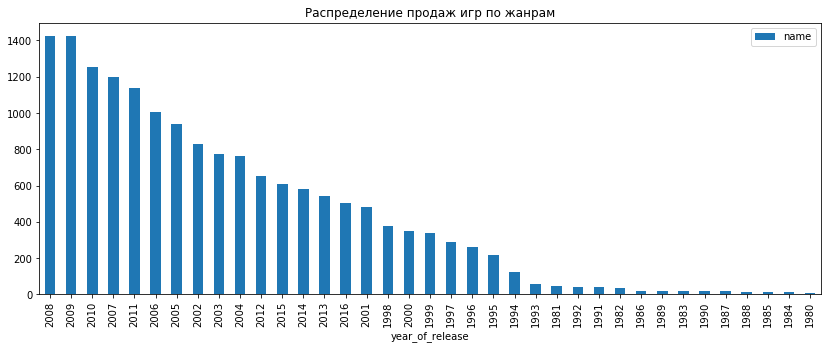

In [17]:
(df 
    .query('year_of_release!=0')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .sort_values('name',ascending=False)
    .reset_index()
    .plot(kind='bar',x='year_of_release',y='name',figsize=(14,5),title='Распределение продаж игр по жанрам')
    
)

До 1991 года выпускалось незначительное количество игр, поэтому можем их убрать

In [18]:
df = df[df['year_of_release']>1990]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,not_rated,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,not_rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,not_rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,not_rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,not_rated,0.01


Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [19]:
plat=pd.pivot_table(df, index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending=False).reset_index().head(10)
platf = plat['platform'].to_list()
plat


,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [20]:
df.query('platform==@platf').pivot_table(index='year_of_release', values='sum_sales',columns='platform',aggfunc='sum')

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,74.16,6.67,205.38,NaN,NaN,NaN,NaN,NaN


Из этой таблицы можно увидеть что после появление новой платформы старая исчезает в течение 3-5 лет
Теперь построим график по нашей таблице

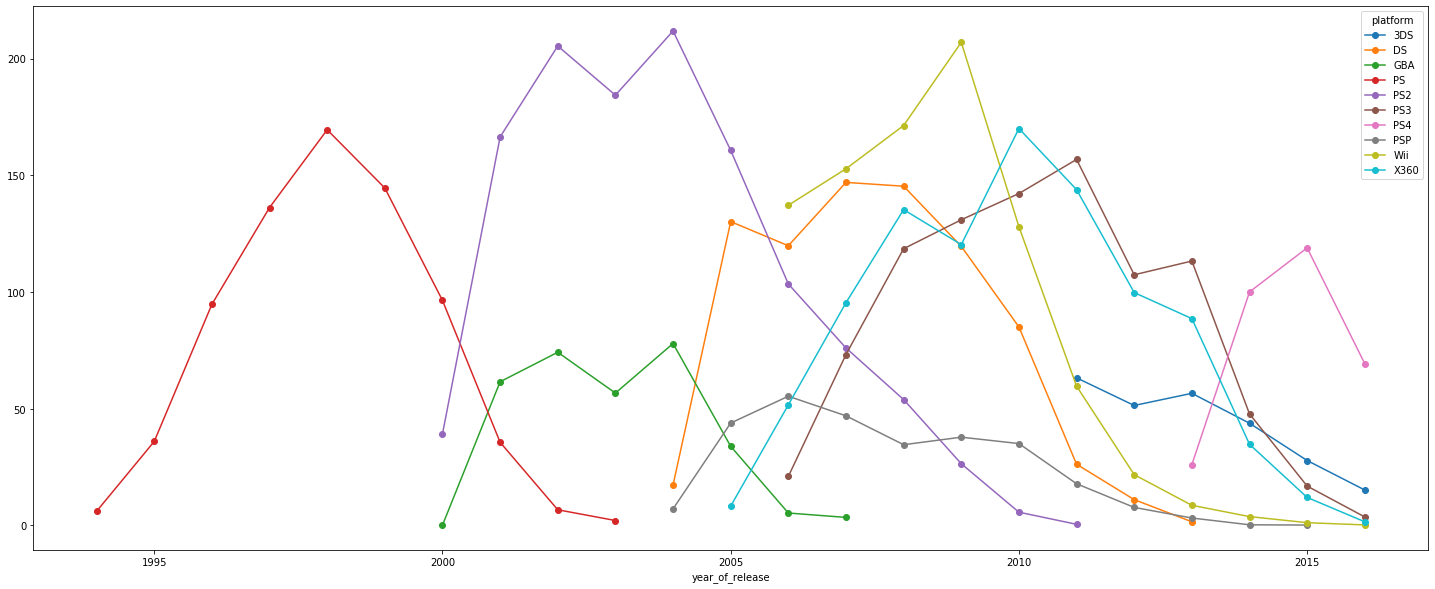

In [21]:
df.query('platform==@platf').pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(style='-o', figsize = (25,10))

##### Отсортируеvм таблицу по актуальному периоду   
Давайте возьмем данные с появлением последних версий игровых консолей PS4 и XOne

In [22]:
actual_period = df[df['year_of_release']>2012]

В описании говорится, что данные за 2016 год могут быть не полными, посмотрим хватает ли нам данных для сравнения

In [23]:
count_year = df['year_of_release'].value_counts().reset_index()
count_year[(count_year['index']==2015)|(count_year['index']==2016)]

,index,year_of_release
11,2015,606
14,2016,502


количество игр ненамного меньше, чем  за предыдущий год, этого вполне достаточно

Теперь посмотрим какие консоли лидируют за данный промежуток времени и как изменяются продажи

In [24]:
actual_period.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales',ascending=False).reset_index()

,platform,sum_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


In [25]:
actual_period.pivot_table(index='year_of_release', values='sum_sales',columns='platform',aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Так же видно тенденцию роста прадаж игр для новых консолей и падения для старых.   
Давайте выберем три консоли которые явно лидируют на рынке и являются потенциально прибыльными: PS4, XOne, 3DS.

In [26]:
top_actual =actual_period.query('(platform=="PS4")|(platform=="XOne")|(platform=="3DS")')

[(0, 2),
 Text(0.5, 1.0, 'Глобальные продажи каждой игры и разбивкой по платформам')]

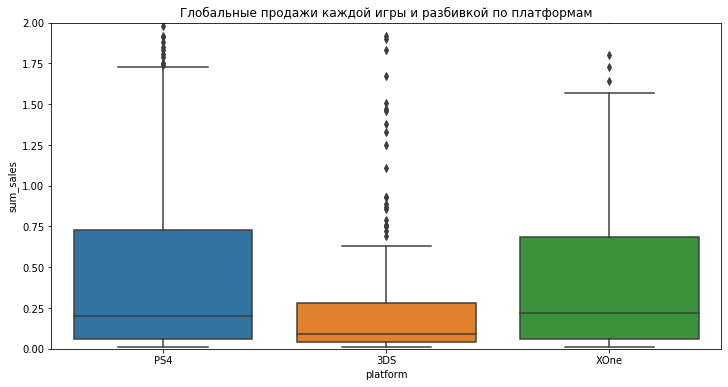

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot( y=top_actual["sum_sales"], x=top_actual["platform"]).set(ylim =[0,2], title='Глобальные продажи каждой игры и разбивкой по платформам')

У консолей PS4 и XOne медианы продаж игр похожи приблизительно равны 0,25 млн долларов. А максимальная граница продаж у PS4 немного превышает XOne. 1,75 и 1,6 соответственно. Платформа 3DS сильно отстает от конкурентов. Медиана 0,1 и верхняя граница 0,75.

Посмотрим, как влияют на продажи отзывы пользователей и критиков. Для примера возьмем 

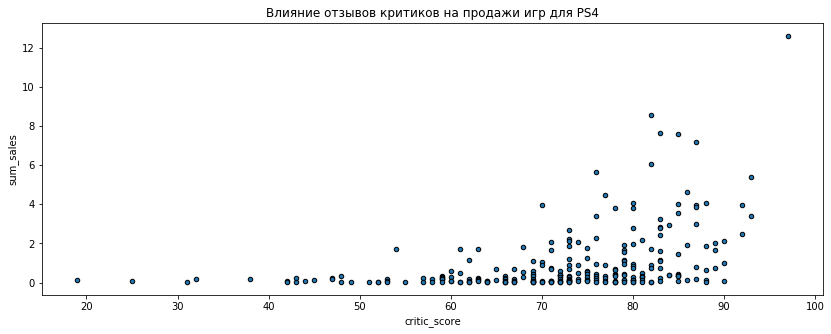

In [28]:
actual_period.query('(platform=="PS4")&(critic_score>0)').plot(x='critic_score', y='sum_sales', kind='scatter', ec='black',figsize=(14,5),title='Влияние отзывов критиков на продажи игр для PS4')

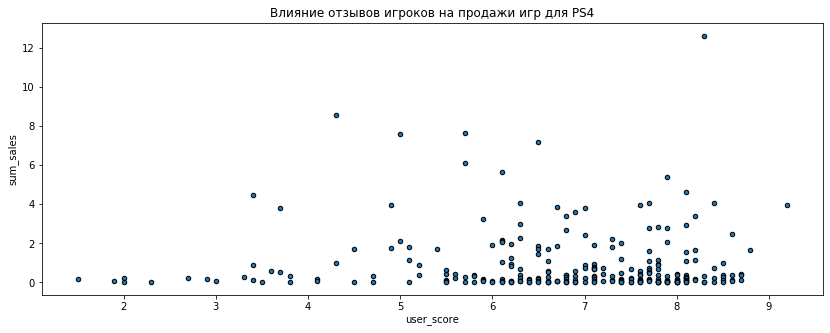

In [29]:
actual_period.query('(platform=="PS4")&(user_score>0)').plot(x='user_score', y='sum_sales', kind='scatter', ec='black',figsize=(14,5),title='Влияние отзывов игроков на продажи игр для PS4')

In [30]:
actual_period_corr = actual_period.query('(platform=="PS4")&(critic_score>0)&(user_score>0)')

In [31]:
print('Корреляция отзывов критиков к продажам:',actual_period_corr['critic_score'].corr(actual_period_corr['sum_sales']))
print('Корреляция отзывов игроков к продажам:',actual_period_corr['user_score'].corr(actual_period_corr['sum_sales']))

Корреляция отзывов критиков к продажам: 0.4058948014583663
Корреляция отзывов игроков к продажам: -0.03362497596528881


Text(0.5, 1, 'Корреляция отзывов к продажам на PS4')

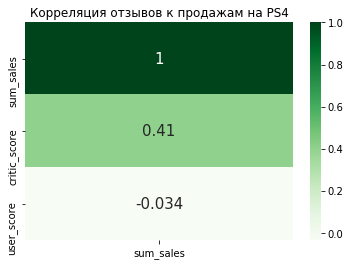

In [32]:
sns.heatmap(actual_period_corr[['sum_sales','critic_score','user_score']].corr()[['sum_sales']].sort_values(by='sum_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15}).set_title('Корреляция отзывов к продажам на PS4')

В общем зависимость продажи от отзывов критиков и пользователей похожи, чем выше отзывы, тем выше продажи.
Но за исключением критиков пользователи не всегда высоко оценивают игры с большими продажами

Судя по корреляции присутствует зависимость продаж от отзывав критиков. По отзывам игроков зависимости нет.

Посмотрим на общее распределение игр по жанрам.

In [33]:
(actual_period
     .pivot_table(index='genre',values='sum_sales',aggfunc='sum')
     .sort_values('sum_sales',ascending=False)
)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


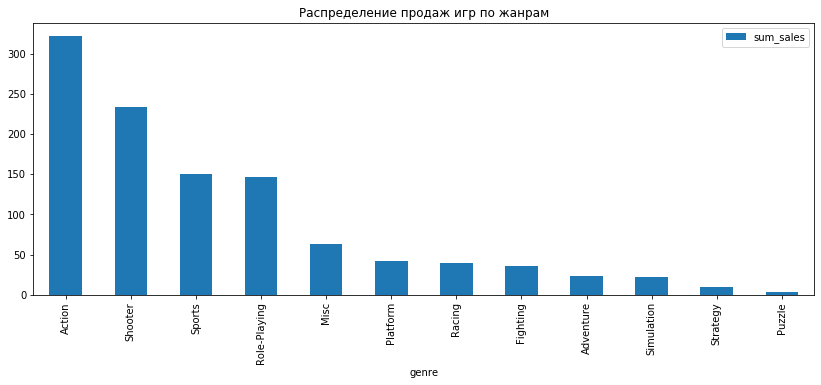

In [34]:
(actual_period
     .pivot_table(index='genre',values='sum_sales',aggfunc='sum')
     .sort_values('sum_sales',ascending=False)
     .plot(kind='bar',figsize=(14,5),title='Распределение продаж игр по жанрам')
     
)

Из таблицы видно, что за актуальный период наибольшей популярностью пользовались такие жанры как Action и Shooter.Меньше всего денег собрали игры с жанром Puzzle

### Составим портрет пользователя каждого региона

Определим для пользователя каждого региона:
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = actual_period.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Авмерике', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': None, 'eu_sales': 'purple', 'jp_sales': 'pink'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales],rot=0)
    plot.legend(prop={'size':16})
    plot.set_xlabel('')
    plot.title.set_size(20)

Начем с самых популярных платформ

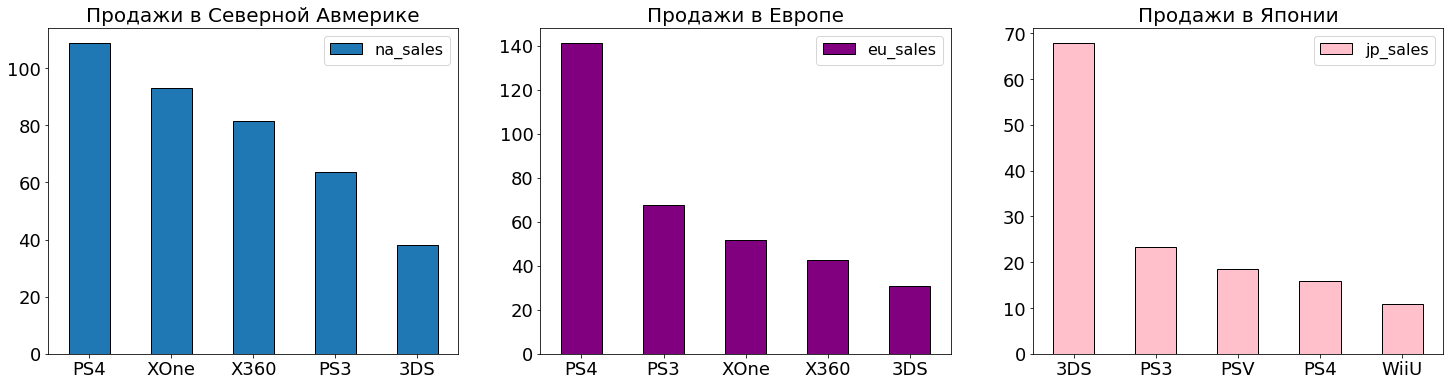

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

Из таблиц видно, что в Европе продажа игр на PS4 сильно превышают продажу игр на остальные консоли. В Японии так же лидирует 3DS

Посмотрим самые популярные жанры

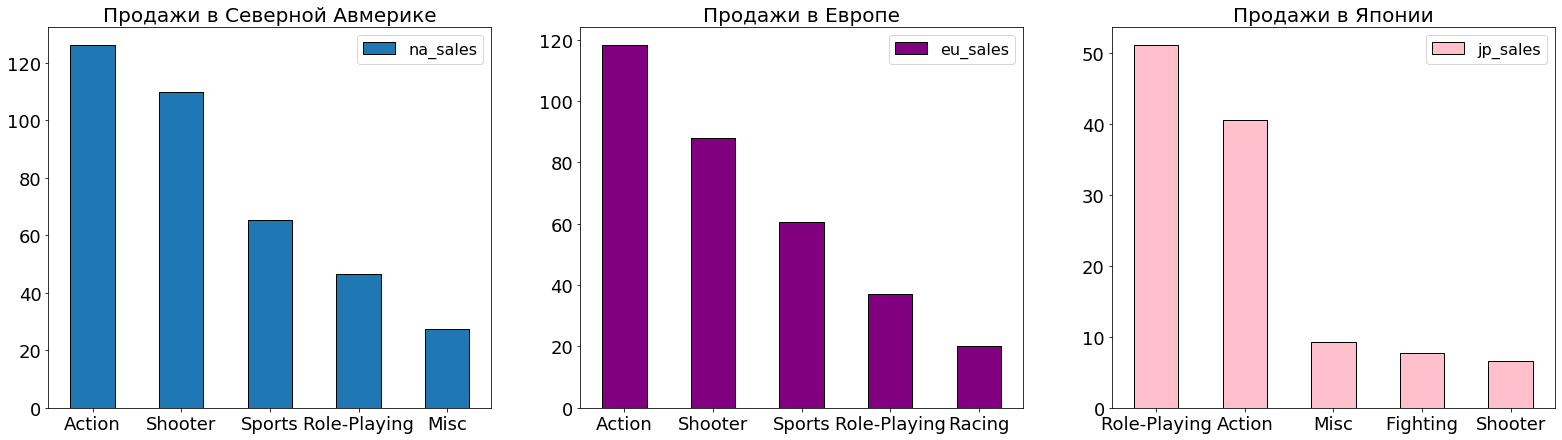

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Северной Америке и Европе большим спросом пользуются жанры Экшн и Шутер. В Японии лидирует РПГ и Экшн

Посмотрим как влияет рейтинг ESRB на продажи в отдельном регионе

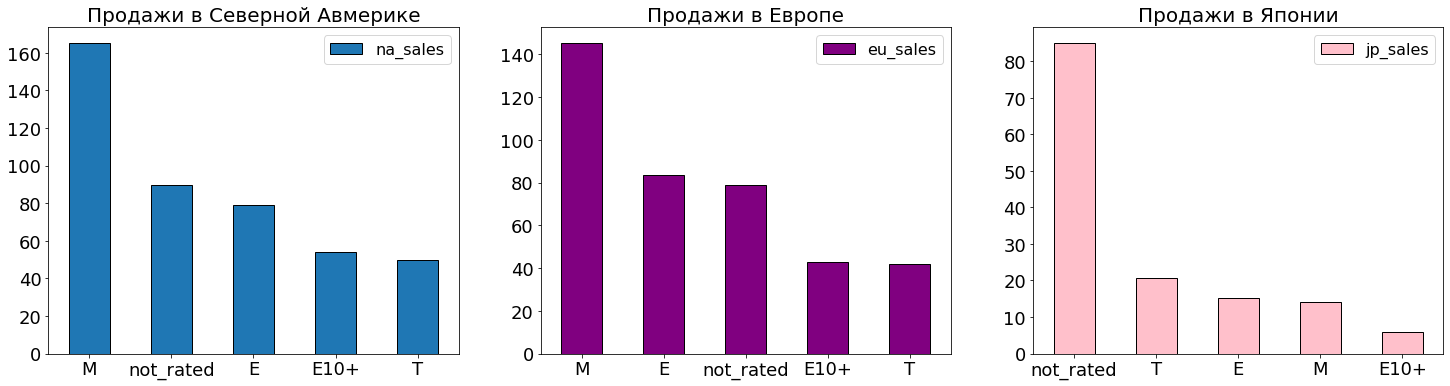

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

В Америке и Европе самая большая продаваемость у игр для взрослых (17+). В Японии преобладабют продажи игр не получивших ретинга ESRB

### Проверим гипотезы

##### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

две совокупности являются независимыми используем метод ttest_ind

In [39]:
from scipy import stats as st

In [40]:
actual_period_user_rated_PC = actual_period[(actual_period['user_score']>0)&(actual_period['platform']=='PC')]
actual_period_user_rated_XOne = actual_period[(actual_period['user_score']>0)&(actual_period['platform']=='XOne')]

In [41]:
alpha = .05
results = st.ttest_ind(
    actual_period_user_rated_PC['user_score'], 
    actual_period_user_rated_XOne['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [42]:
print('Средний пользовательские рейтинги платформ PC:',actual_period_user_rated_PC['user_score'].mean())
print('Средний пользовательские рейтинги платформ Xbox One:',actual_period_user_rated_XOne['user_score'].mean())

Средний пользовательские рейтинги платформ PC: 6.269677419354836
Средний пользовательские рейтинги платформ Xbox One: 6.52142857142857


У нас не получилось отвергнуть нулевую гипотезу, поэтому можно сделать вывод, что средние пользовательские рейтинги одинаковы

##### Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

- H0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports разные

In [43]:
actual_period_user_rated_Action = actual_period[(actual_period['user_score']>0)&(actual_period['genre']=='Action')]
actual_period_user_rated_Sports = actual_period[(actual_period['user_score']>0)&(actual_period['genre']=='Sports')]

In [44]:
alpha = .05
results = st.ttest_ind(
    actual_period_user_rated_Action['user_score'], 
    actual_period_user_rated_Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [45]:
print('Средний пользовательские рейтинги по играм в жанре Action:',round(actual_period_user_rated_Action['user_score'].mean(),2))
print('Средний пользовательские рейтинги по играм в жанре Sports:',round(actual_period_user_rated_Sports['user_score'].mean(),2))

Средний пользовательские рейтинги по играм в жанре Action: 6.84
Средний пользовательские рейтинги по играм в жанре Sports: 5.24


Отвергаем нулевую гипотезу, следовательно наша гипотеза, что рейтинг жанров Action и Sports разные, подтвердилась.

## Общий вывод

Проведя анализ мы узнали:
- Ведущими игровыми платформами на актуальный период являются PS4, XOne и 3DS, причем в разных странах популярность приставок различна. В Японии с сильным отрывом лидирует 3DS, в Европе отдают предпочтение PS4
- Отзывы критиков невсегда схожи с отзывами игроков. Игроки могут не оценить игры, которые пользуются кассовым успехом
- Наиболее продаваемыми жанрами в мире, являются жанры: Action и Shooter, хотя в Японии первое место занимает RPG
- Самая большая продаваемость у игр для взрослых (17+)(исключая Японию в которой большинство проданных игр не имеет рейтинга ESRB)

Так же мы проверили две гипотезы и установили что:
- Средние пользовательские рейтинги на платформах PC и XOne одинаковы
- Средние пользовательсиие рейтинги жанров Action и Sports различны